# Investigate Hotel Business using Data Visualization

## Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Read Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Mini Project/Investigate Hotel Business using Data Visualization/hotel_bookings_data.csv')
df.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
78844,City Hotel,1,4,2017,December,43,19,1,0,2,...,0,No Deposit,47.0,NaN,0,Personal,90.0,0,0,Canceled
80094,City Hotel,1,333,2018,November,39,20,0,2,2,...,0,Non Refund,58.0,NaN,19,Personal,90.0,0,0,Canceled
38557,Resort Hotel,0,108,2019,September,28,15,2,5,3,...,0,No Deposit,NaN,NaN,0,Personal,239.0,0,2,Check-Out
110501,City Hotel,0,46,2019,June,17,24,1,3,3,...,0,No Deposit,9.0,NaN,0,Personal,171.0,0,0,Check-Out
78634,City Hotel,1,29,2017,December,44,29,0,3,1,...,0,No Deposit,9.0,NaN,0,Contract,120.0,0,3,Canceled


## 1. Data Preprocessing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Kesimpulan :
1. Data terdiri dari dari 29 kolom dan 119390 baris.
2. Untuk kolom 'children' lebih baik diubah tipe datanya menjadi int & selebihnya tipe data untuk setiap kolom sudah sesuai.
3. Terdapat beberapa kolom yang memiliki Data Null yang harus dibersihkan terlebih dahulu.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Karena pada kolom 'children' terdapat data Missing Value/Null maka tipe data kolom tersebut tidak bisa diubah menjadi int sebelum diatasi terlebih dahulu Missing Value/Null dari kolom tersebut.

### Handling Missing Value

In [6]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_weekdays_nights               0
adults                                 0
children                               4
babies                                 0
meal                                   0
city                                 488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type   

#### Children

In [7]:
df['children'].fillna(df['children'].mode()[0], inplace = True)

In [8]:
df['children'] = df['children'].astype('int64')

#### City

In [9]:
df['city'].fillna(df['city'].mode()[0], inplace = True)

#### Agent

In [10]:
df['agent'].fillna(df['agent'].median(), inplace=True)

#### Company

Lebih dari 90 % Data pada kolom 'Company' merupakan Data Missing Value/Null, maka kolom 'Company' akan di drop.

In [11]:
df.drop('company', axis=1, inplace=True)

#### Check Missing Value

In [12]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_weekdays_nights          0
adults                            0
children                          0
babies                            0
meal                              0
city                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status          

### Handling Invalid Value

In [13]:
df['meal'].value_counts()

Breakfast     92310
Dinner        14463
No Meal       10650
Undefined      1169
Full Board      798
Name: meal, dtype: int64

In [14]:
pd.set_option('display.max_columns', None)

In [15]:
df[df['meal'] == 'Undefined'].sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
35803,Resort Hotel,0,100,2019,June,17,29,2,1,2,0,0,Undefined,Kota Denpasar,Groups,TA/TO,0,0,0,0,No Deposit,385.0,0,Family,93.00,0,0,Check-Out
33129,Resort Hotel,0,110,2019,April,6,9,2,5,2,0,0,Undefined,Kabupaten Magelang,Offline TA/TO,TA/TO,0,0,0,1,No Deposit,464.0,0,Personal,66.00,0,0,Check-Out
19211,Resort Hotel,1,92,2018,April,9,26,1,2,2,0,0,Undefined,Kota Denpasar,Groups,TA/TO,0,1,0,0,Non Refund,134.0,0,Personal,79.00,0,0,Canceled
4571,Resort Hotel,0,136,2018,May,13,24,0,3,2,0,0,Undefined,Kota Batu,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,387.0,0,Family,84.00,0,0,Check-Out
19731,Resort Hotel,0,112,2017,February,53,30,0,3,2,0,0,Undefined,Kota Denpasar,Groups,Direct,0,0,0,0,No Deposit,14.0,0,Family,237.33,0,0,Check-Out


Pada kolom 'meal' terdapat data bernilai 'Undefined' dimana pada umumnya Hotel Meal Plan tidak memiliki kategori 'Undefined'. Data 'Undefined' pada kolom 'meal' akan diganti dengan 'No Meal'.

In [16]:
df['meal'].replace({'Undefined' : 'No Meal'}, inplace=True)

In [17]:
df['meal'].value_counts()

Breakfast     92310
Dinner        14463
No Meal       11819
Full Board      798
Name: meal, dtype: int64

### Handling Unnecessary Data

#### Duplicates Data

In [18]:
df.duplicated().sum()

33294

In [19]:
df[df.duplicated(keep = False)].sample(6)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
71999,City Hotel,1,56,2019,September,29,17,1,2,2,0,0,No Meal,Kota Surabaya,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,0,Personal,130.0,0,1,Canceled
50614,City Hotel,0,288,2018,July,19,5,0,3,2,0,0,Breakfast,Kota Yogyakarta,Groups,TA/TO,0,0,0,0,No Deposit,1.0,259,Family,62.5,0,1,Check-Out
64574,City Hotel,1,52,2019,May,11,13,1,1,1,0,0,Breakfast,Kota Denpasar,Offline TA/TO,TA/TO,0,0,0,0,Non Refund,56.0,0,Personal,80.0,0,0,Canceled
107645,City Hotel,0,211,2019,May,11,13,1,2,1,0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,8.0,0,Personal,85.5,0,1,Check-Out
62111,City Hotel,1,93,2019,March,1,2,1,2,3,0,0,Breakfast,Kota Batu,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,0,Personal,126.0,0,1,Canceled
14761,Resort Hotel,1,259,2017,November,38,17,0,3,1,0,0,Breakfast,Kabupaten Bangka,Groups,Corporate,0,1,0,0,Non Refund,14.0,0,Personal,33.3,0,0,Canceled


Terlihat terdapat cukup banyak duplicated data untuk setiap pemesanan pada dataframe, maka kita perlu menghilangkan duplicated data tersebut agar data menjadi lebih bersih dan siap untuk dianalisis lebih lanjut.

In [20]:
df.shape

(119390, 28)

In [21]:
df.drop_duplicates(inplace=True)

In [22]:
df.shape

(86096, 28)

#### Value Column 'Adults'

In [23]:
df['adults'].value_counts()

2     63676
1     16057
3      5904
0       383
4        60
26        5
27        2
20        2
5         2
40        1
50        1
55        1
6         1
10        1
Name: adults, dtype: int64

In [24]:
df[df['adults'] == 0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
2224,Resort Hotel,0,1,2017,December,41,6,0,3,0,0,0,No Meal,Kota Denpasar,Corporate,Corporate,0,0,0,1,No Deposit,14.0,0,Family,0.00,0,0,Check-Out
2409,Resort Hotel,0,0,2017,December,42,12,0,0,0,0,0,No Meal,Kota Denpasar,Corporate,Corporate,0,0,0,0,No Deposit,14.0,0,Personal,0.00,0,0,Check-Out
3181,Resort Hotel,0,36,2017,January,47,20,1,2,0,0,0,No Meal,Kota Batu,Groups,TA/TO,0,0,0,0,No Deposit,38.0,0,Family,0.00,0,0,Check-Out
3684,Resort Hotel,0,165,2017,February,53,30,1,4,0,0,0,No Meal,Kota Denpasar,Groups,TA/TO,0,0,0,1,No Deposit,308.0,122,Family,0.00,0,0,Check-Out
3708,Resort Hotel,0,165,2017,February,53,30,2,4,0,0,0,No Meal,Kota Denpasar,Groups,TA/TO,0,0,0,1,No Deposit,308.0,122,Family,0.00,0,0,Check-Out
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117204,City Hotel,0,296,2019,September,30,27,1,3,0,2,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,0,Personal,98.85,0,1,Check-Out
117274,City Hotel,0,276,2019,September,31,30,2,1,0,2,0,Breakfast,Kabupaten Bandung,Online TA,TA/TO,0,0,0,1,No Deposit,9.0,0,Personal,93.64,0,2,Check-Out
117303,City Hotel,0,291,2019,September,30,29,2,2,0,2,0,Breakfast,Kota Denpasar,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,0,Personal,98.85,0,1,Check-Out
117453,City Hotel,0,159,2019,September,31,31,1,3,0,2,0,No Meal,Kota Yogyakarta,Online TA,TA/TO,0,0,0,1,No Deposit,9.0,0,Personal,121.88,0,1,Check-Out


Terlihat terdapat data bernilai 0 pada kolom 'adults' yang mengartikan bahwa tidak ada orang dewasa dalam pemesanan tersebut dimana hal tersebut tidak mungkin terjadi. Maka data dengan adults == 0 akan dihapus.

In [25]:
df = df[df['adults'] != 0]

In [26]:
df[df['adults'] == 0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status


#### February Date Data

In [27]:
temp = df.groupby('arrival_date_month')['arrival_date_day_of_month'].unique().reset_index()
temp1 = temp[temp['arrival_date_month'] == 'February']
temp1['arrival_date_day_of_month'].tolist()

[array([ 1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 17, 18, 19,
        20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,  9, 16])]

Terlihat pada bulan Februari terdapat tanggal 29, 30 & 31 dimana seharusnya untuk bulan Februari pada tahun 2017 - 2019 hanya sampai tanggal 28.

In [28]:
df = df[~((df['arrival_date_day_of_month'].isin([29,30,31])) & (df['arrival_date_month']=='February'))]

In [29]:
temp = df.groupby('arrival_date_month')['arrival_date_day_of_month'].unique().reset_index()
temp1 = temp[temp['arrival_date_month'] == 'February']
temp1['arrival_date_day_of_month'].tolist()

[array([ 1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 17, 18, 19,
        20, 21, 22, 23, 24, 25, 26, 27, 28,  9, 16])]

## 2. Monthly Hotel Booking Analysis Based on Hotel Type

### Agregration Table

In [30]:
df_grouped = df.groupby(['hotel','arrival_date_year','arrival_date_month'])['reservation_status'].count().reset_index()

In [31]:
df_grouped.sort_values(['arrival_date_month', 'arrival_date_year'], ascending = [False,True])

,hotel,arrival_date_year,arrival_date_month,reservation_status
5,City Hotel,2017,September,373
31,Resort Hotel,2017,September,1275
17,City Hotel,2018,September,2441
43,Resort Hotel,2018,September,1357
25,City Hotel,2019,September,2828
51,Resort Hotel,2019,September,1664
4,City Hotel,2017,October,1050
30,Resort Hotel,2017,October,1344
16,City Hotel,2018,October,2757
42,Resort Hotel,2018,October,1598


Kesimpulan :
1. Untuk Tahun 2017 hanya terdapat data bulan Januari, Februari, September, Oktober, November & Desember.
2. Untuk Tahun 2018 data lengkap dari bulan Januari s.d. Desember.
3. Untuk Tahun 2019 hanya terdapat data bulan Maret s.d. Oktober.
4. Maka untuk data tahun 2017 tidak bisa digunakan dalam melakukan analisis karena hanya terdapat data untuk 6 bulan dan data bulannya tidak berurutan.
5. Untuk data tahun 2019 masih dapat dianalisis karena terdapat data untuk 8 bulan dan data bulannya berururtan, tetapi untuk data bulan yang tidak ada (Januari, Februaru, November & Desember) dapat diisi dengan nilai 0 pada Tabel Agregasi (df_grouped) yang berarti tidak ada pemesanan hotel pada bulan tersebut untuk seluruh kategori hotel.


### Monthly Data Normalization Each Year

In [32]:
df_grouped = df_grouped[df_grouped['arrival_date_year'] != 2017]

In [33]:
city_2019 = pd.DataFrame({'hotel' : ['City Hotel','City Hotel','City Hotel','City Hotel'],
                          'arrival_date_year' : [2019,2019,2019,2019], 'arrival_date_month' : ['January','February','November','December'],
                          'reservation_status' : [0,0,0,0]})
df_grouped = df_grouped.append(city_2019, ignore_index = True)

In [34]:
res_2019 = pd.DataFrame({'hotel' : ['Resort Hotel','Resort Hotel','Resort Hotel','Resort Hotel'],
                          'arrival_date_year' : [2019,2019,2019,2019], 'arrival_date_month' : ['January','February','November','December'],
                          'reservation_status' : [0,0,0,0]})
df_grouped = df_grouped.append(res_2019, ignore_index = True)

In [35]:
df_grouped.sort_values(['arrival_date_month', 'arrival_date_year'], ascending = [False,True])

,hotel,arrival_date_year,arrival_date_month,reservation_status
11,City Hotel,2018,September,2441
31,Resort Hotel,2018,September,1357
19,City Hotel,2019,September,2828
39,Resort Hotel,2019,September,1664
10,City Hotel,2018,October,2757
30,Resort Hotel,2018,October,1598
18,City Hotel,2019,October,2649
38,Resort Hotel,2019,October,1705
9,City Hotel,2018,November,2504
29,Resort Hotel,2018,November,1259


### Sorting by Month

In [36]:
month_dict = {'January':1,'February':2,'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 
              'September':9, 'October':10, 'November':11, 'December':12}

In [37]:
df_sorted = df_grouped.sort_values('arrival_date_month', key = lambda x : x.apply (lambda x : month_dict[x]))
df_sorted

,hotel,arrival_date_year,arrival_date_month,reservation_status
44,Resort Hotel,2019,January,0
4,City Hotel,2018,January,2108
40,City Hotel,2019,January,0
24,Resort Hotel,2018,January,1179
23,Resort Hotel,2018,February,985
45,Resort Hotel,2019,February,0
3,City Hotel,2018,February,1727
41,City Hotel,2019,February,0
7,City Hotel,2018,March,1003
36,Resort Hotel,2019,March,1114


In [38]:
df_sorted['arrival_date_month'] = df_sorted['arrival_date_month'].replace(['January','February','August','September','October','November','December'],
                                                                          ['Jan','Feb','Aug','Sept','Oct','Nov','Dec'])
df_sorted

,hotel,arrival_date_year,arrival_date_month,reservation_status
44,Resort Hotel,2019,Jan,0
4,City Hotel,2018,Jan,2108
40,City Hotel,2019,Jan,0
24,Resort Hotel,2018,Jan,1179
23,Resort Hotel,2018,Feb,985
45,Resort Hotel,2019,Feb,0
3,City Hotel,2018,Feb,1727
41,City Hotel,2019,Feb,0
7,City Hotel,2018,March,1003
36,Resort Hotel,2019,March,1114


### Data Visualization

In [39]:
import matplotlib.style as style

In [40]:
city = df_sorted[df_sorted['hotel']=='City Hotel']

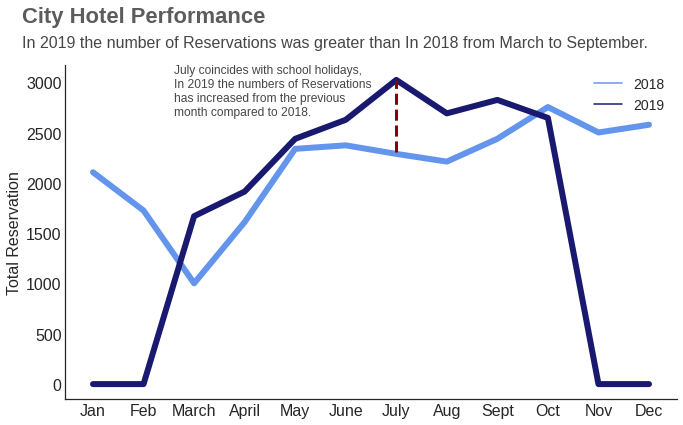

In [41]:
style.use('seaborn-white')

fig, ax = plt.subplots(figsize=(10,6))
ax = sns.lineplot(data=city, x = 'arrival_date_month', y = 'reservation_status', hue = 'arrival_date_year', palette = ['cornflowerblue','midnightblue'], 
                  linewidth = 6)
sns.despine()
ax.set(xlabel=None)

plt.axvline('July', color='darkred', linestyle='--', linewidth=3, ymin = 0.74, ymax=0.955)

plt.tick_params(axis='both', which = 'major', labelsize=16)
plt.ylabel('Total Reservation', fontsize = 16)

legend = plt.legend(fontsize = 14, loc="upper right")
legend.get_frame().set_alpha(0.2)

# Adding a title, a subtitle and text
ax.text(x = -1.4, y = 3600, s = "City Hotel Performance",
               fontsize = 22, weight = 'bold', alpha = .75)
ax.text(x = -1.4, y = 3350,
               s = 'In 2019 the number of Reservations was greater than In 2018 from March to September.',
              fontsize = 16, alpha = .85)
ax.text(x = 1.6, y = 2680,
               s = 'July coincides with school holidays,\nIn 2019 the numbers of Reservations \nhas increased from the previous \nmonth compared to 2018.',
              fontsize = 12, alpha = .85)

plt.tight_layout()
plt.savefig('city hotel.png', dpi=200);
plt.show()

In [42]:
res = df_sorted[df_sorted['hotel']=='Resort Hotel']

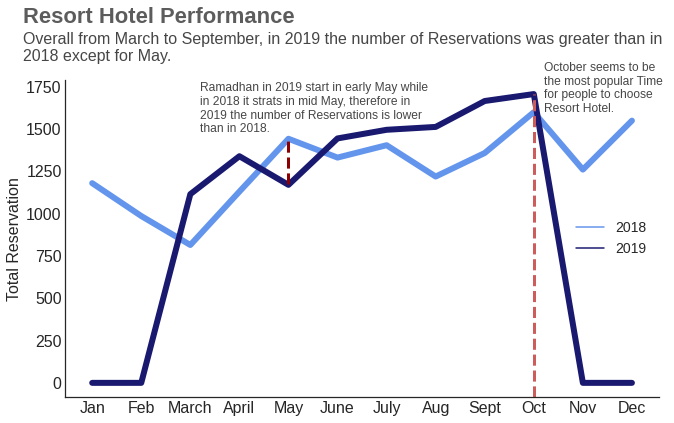

In [43]:
style.use('seaborn-white')

fig, ax = plt.subplots(figsize=(10,6))
ax = sns.lineplot(data=res, x = 'arrival_date_month', y = 'reservation_status', hue = 'arrival_date_year', palette = ['cornflowerblue','midnightblue'], 
                  linewidth = 6)
sns.despine()
ax.set(xlabel=None)

plt.axvline('May', color='darkred', linestyle='--', linewidth=3, ymin = 0.67, ymax=0.82)
plt.axvline('Oct', color='indianred', linestyle='--', linewidth=3, ymin = 0, ymax=0.955)

plt.tick_params(axis='both', which = 'major', labelsize=16)
plt.ylabel('Total Reservation', fontsize = 16)

legend = plt.legend(fontsize = 14, loc="center right")
legend.get_frame().set_alpha(0.2)

# Adding a title, a subtitle and text
ax.text(x = -1.4, y = 2125, s = "Resort Hotel Performance",
               fontsize = 22, weight = 'bold', alpha = .75)
ax.text(x = -1.4, y = 1900,
               s = 'Overall from March to September, in 2019 the number of Reservations was greater than in \n2018 except for May.',
              fontsize = 16, alpha = .85)
ax.text(x = 2.2, y = 1480,
               s = 'Ramadhan in 2019 start in early May while \nin 2018 it strats in mid May, therefore in \n2019 the number of Reservations is lower \nthan in 2018.',
              fontsize = 12, alpha = .85)
ax.text(x = 9.2, y = 1600,
               s = 'October seems to be \nthe most popular Time \nfor people to choose \nResort Hotel.',
              fontsize = 12, alpha = .85)

plt.tight_layout()
plt.savefig('resort hotel.png', dpi=200);
plt.show()

## 3. Impact Analysis of Stay Duration on Hotel Booking Cancelation Rate

In [44]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,3,No Deposit,14.0,0,Personal,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,4,No Deposit,14.0,0,Personal,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,0,0,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,0,No Deposit,14.0,0,Personal,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,0,0,Breakfast,Kabupaten Bangka,Corporate,Corporate,0,0,0,0,No Deposit,304.0,0,Personal,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,0,Personal,98.0,0,1,Check-Out


In [45]:
df['stay_duration'] = df['stays_in_weekend_nights'] + df['stays_in_weekdays_nights']
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,stay_duration
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,3,No Deposit,14.0,0,Personal,0.0,0,0,Check-Out,0
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,4,No Deposit,14.0,0,Personal,0.0,0,0,Check-Out,0
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,0,0,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,0,No Deposit,14.0,0,Personal,75.0,0,0,Check-Out,1
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,0,0,Breakfast,Kabupaten Bangka,Corporate,Corporate,0,0,0,0,No Deposit,304.0,0,Personal,75.0,0,0,Check-Out,1
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,0,Personal,98.0,0,1,Check-Out,2


In [46]:
df['stay_duration'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7, 14, 15, 10, 11,  8,  9, 21, 13, 12,
       18, 46, 28, 17, 19, 22, 23, 16, 29, 42, 20, 26, 33, 30, 56, 25, 27,
       60, 69, 35, 45, 38, 24, 48, 34])

Terlihat terdapat durasi stay yang berjumlah 0 hari, maka perlu dibersihkan terlebih dahulu data dengan stay_duration = 0.

In [47]:
df = df[df['stay_duration'] != 0]

In [48]:
df['stay_duration'].unique()

array([ 1,  2,  3,  4,  5,  6,  7, 14, 15, 10, 11,  8,  9, 21, 13, 12, 18,
       46, 28, 17, 19, 22, 23, 16, 29, 42, 20, 26, 33, 30, 56, 25, 27, 60,
       69, 35, 45, 38, 24, 48, 34])

Untuk data kolom stay_duration akan dilakukan pengelompokkan berdasarkan durasi menginap menjadi beberapa kategori, dan untuk pengelompokkan tersebut akan dilakukan berdasarkan beberapa ketentuan :
- Under a Week : Durasi menginap kurang dari seminggu (< 7 hari).
- A Week : Durasi menginap selama seminggu (= 7 hari).
- Over a Week : Durasi menginap lebih dari seminggu (> 7 hari).

In [49]:
df['stay_category'] = np.where(df['stay_duration'] < 7, 'Under a Week', (np.where(df['stay_duration'] == 7, 'A Week', 'Over a Week')))

In [50]:
stay_duration = df.groupby(['hotel','stay_category','is_canceled'])['reservation_status'].count().reset_index()
stay_duration['percentage'] = round(100*(stay_duration['reservation_status']/stay_duration.groupby(['hotel','stay_category'])['reservation_status'].transform('sum')),2)
stay_duration

,hotel,stay_category,is_canceled,reservation_status,percentage
0,City Hotel,A Week,0,1137,62.51
1,City Hotel,A Week,1,682,37.49
2,City Hotel,Over a Week,0,515,45.06
3,City Hotel,Over a Week,1,628,54.94
4,City Hotel,Under a Week,0,34292,70.60
5,City Hotel,Under a Week,1,14277,29.40
6,Resort Hotel,A Week,0,4026,71.68
7,Resort Hotel,A Week,1,1591,28.32
8,Resort Hotel,Over a Week,0,2644,72.40
9,Resort Hotel,Over a Week,1,1008,27.60


In [51]:
df_canceled = stay_duration[stay_duration['is_canceled'] == 1]
df_canceled

,hotel,stay_category,is_canceled,reservation_status,percentage
1,City Hotel,A Week,1,682,37.49
3,City Hotel,Over a Week,1,628,54.94
5,City Hotel,Under a Week,1,14277,29.40
7,Resort Hotel,A Week,1,1591,28.32
9,Resort Hotel,Over a Week,1,1008,27.60
11,Resort Hotel,Under a Week,1,5198,22.02


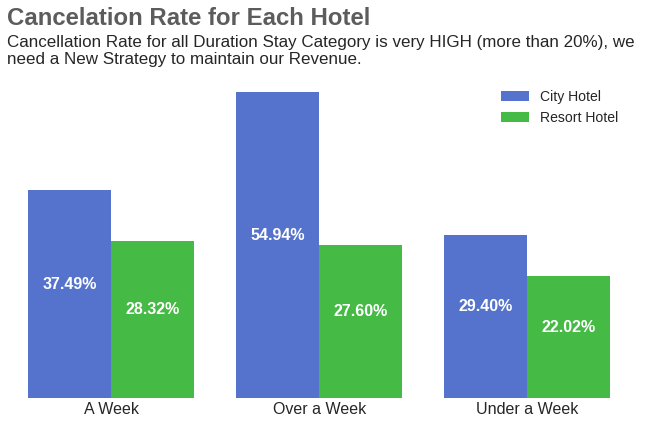

In [52]:
style.use('seaborn-white')

fig, ax = plt.subplots(figsize=(10,6))

ax = sns.barplot(data=df_canceled, x='stay_category', y='percentage', hue='hotel', palette = ['royalblue','limegreen'])
for p in ax.patches:
  ax.annotate('%.2f' % p.get_height() + '%' ,xy =(p.get_x() + p.get_width()/2 , p.get_y() + p.get_height()/2),
              xytext=(0, 5), textcoords='offset points', ha='center', fontsize=16, color='white', weight = 'bold')
  
sns.despine(left=True, bottom=True)
ax.set(xlabel=None)
ax.set(ylabel=None)

plt.yticks([])
plt.tick_params(axis='both', which = 'major', labelsize=16)

# Adding a title, a subtitle and text
ax.text(x = -0.5, y = 67, s = "Cancelation Rate for Each Hotel",
               fontsize = 24, weight = 'bold', alpha = .75)
ax.text(x = -0.5, y = 60,
               s = 'Cancellation Rate for all Duration Stay Category is very HIGH (more than 20%), we \nneed a New Strategy to maintain our Revenue.',
              fontsize = 17)

legend = plt.legend(fontsize = 14, loc="upper right")
legend.get_frame().set_alpha(0.2)

plt.tight_layout()
plt.savefig('stay duration.png', dpi=200);
plt.show()

## 4. Impact Analysis of Lead Time on Hotel Booking Cancelation Rate

In [53]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,stay_duration,stay_category
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,0,0,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,0,No Deposit,14.0,0,Personal,75.0,0,0,Check-Out,1,Under a Week
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,0,0,Breakfast,Kabupaten Bangka,Corporate,Corporate,0,0,0,0,No Deposit,304.0,0,Personal,75.0,0,0,Check-Out,1,Under a Week
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,0,Personal,98.0,0,1,Check-Out,2,Under a Week
6,Resort Hotel,0,0,2017,September,27,1,0,2,2,0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,0,No Deposit,14.0,0,Personal,107.0,0,0,Check-Out,2,Under a Week
7,Resort Hotel,0,9,2017,September,27,1,0,2,2,0,0,Full Board,Kota Denpasar,Direct,Direct,0,0,0,0,No Deposit,303.0,0,Personal,103.0,0,1,Check-Out,2,Under a Week


Akan dibuat kolom baru berisi data kategori dari nilai lead_time setiap customer dengan mengelompokkanya berdasarkan interval setiap 30 hari dengan ketentuan :
- Walk In : Lead time = 0, yang artinya customer memesan hotel tanpa reservasi.
- One-Month Period : Lead time antara 1 - 30 hari.
- Two-Month Period : Lead time antara 31 - 60 hari.
- Three-Month Period : Lead time antara 61 - 90 hari.
- Over Three-Month Period : Lead time > 90 hari.

In [54]:
x=[3,5,1,12,15,3,22,1,14,28]
for i in x :
  if i in range(1,15,1) :
    print(i, True)
  else :
    print(i, False)

3 True
5 True
1 True
12 True
15 False
3 True
22 False
1 True
14 True
28 False


In [55]:
df[df['lead_time'] == 0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,stay_duration,stay_category
6,Resort Hotel,0,0,2017,September,27,1,0,2,2,0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,0,No Deposit,14.0,0,Personal,107.00,0,0,Check-Out,2,Under a Week
18,Resort Hotel,0,0,2017,September,27,1,0,1,2,0,0,Breakfast,Kota Yogyakarta,Corporate,Corporate,0,0,0,0,No Deposit,14.0,0,Personal,107.42,0,0,Check-Out,1,Under a Week
56,Resort Hotel,0,0,2017,September,27,2,0,1,2,0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,0,No Deposit,14.0,0,Personal,147.00,0,0,Check-Out,1,Under a Week
57,Resort Hotel,0,0,2017,September,27,2,0,1,2,0,0,Breakfast,Kota Denpasar,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,0,Personal,117.90,0,2,Check-Out,1,Under a Week
58,Resort Hotel,0,0,2017,September,27,2,0,1,2,0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,0,No Deposit,14.0,0,Personal,123.00,0,0,Check-Out,1,Under a Week
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119137,City Hotel,0,0,2019,October,35,29,0,1,2,0,0,No Meal,Kota Denpasar,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,0,Personal,140.00,0,0,Check-Out,1,Under a Week
119138,City Hotel,0,0,2019,October,34,23,2,5,2,0,0,Dinner,Kabupaten Magelang,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,394.0,0,Personal,112.10,0,0,Check-Out,7,A Week
119151,City Hotel,0,0,2019,October,35,29,0,1,2,2,0,Breakfast,Kabupaten Belitung,Direct,Direct,0,0,0,0,No Deposit,14.0,0,Personal,270.00,0,0,Check-Out,1,Under a Week
119166,City Hotel,0,0,2019,October,35,30,0,1,1,0,0,Breakfast,Kota Jakarta Barat,Direct,Direct,0,0,0,0,No Deposit,14.0,0,Personal,140.00,0,0,Check-Out,1,Under a Week


In [56]:
def segment(x) :
  value = x['lead_time']
  if value == 0 :
    segment = 'Walk In'
  elif value in range(1, 31, 1):
    segment = 'One-Month Period'
  elif value in range(31, 61, 1) :
    segment  = 'Two-Month Period'
  elif value in range(61,91,1) :
    segment = 'Three-Month Period'
  elif value > 90 :
    segment = 'Over Three-Month Period'
  return segment

In [57]:
df['booking_category'] = df.apply(lambda x : segment(x), axis = 1)

In [58]:
df.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,stay_duration,stay_category,booking_category
33909,Resort Hotel,0,34,2019,May,10,5,1,0,2,0,0,Breakfast,Kota Denpasar,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,0,Personal,60.00,1,2,Check-Out,1,Under a Week,Two-Month Period
13551,Resort Hotel,1,211,2019,October,33,19,2,5,2,0,0,Dinner,Kota Denpasar,Online TA,TA/TO,0,0,0,0,No Deposit,175.0,0,Personal,133.74,0,0,Canceled,7,A Week,Over Three-Month Period
57860,City Hotel,1,4,2018,December,41,2,1,0,2,0,0,No Meal,Kota Denpasar,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,0,Personal,140.00,0,0,Canceled,1,Under a Week,One-Month Period
46531,City Hotel,0,28,2018,March,2,4,1,3,3,0,0,Breakfast,Kota Batu,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,159.0,0,Family,122.00,0,1,Check-Out,4,Under a Week,One-Month Period
14299,Resort Hotel,0,0,2018,May,11,9,0,2,1,0,0,Breakfast,Kota Denpasar,Corporate,Corporate,0,0,4,0,No Deposit,14.0,0,Personal,30.00,0,0,Check-Out,2,Under a Week,Walk In


In [62]:
booking_cat = df.groupby(['hotel','booking_category','is_canceled'])['reservation_status'].count().reset_index()
booking_cat['percentage'] = round(100*(booking_cat['reservation_status']/booking_cat.groupby(['hotel','booking_category'])['reservation_status'].transform('sum')),2)
booking_cat

,hotel,booking_category,is_canceled,reservation_status,percentage
0,City Hotel,One-Month Period,0,13409,78.54
1,City Hotel,One-Month Period,1,3663,21.46
2,City Hotel,Over Three-Month Period,0,10306,60.23
3,City Hotel,Over Three-Month Period,1,6805,39.77
4,City Hotel,Three-Month Period,0,4019,66.13
5,City Hotel,Three-Month Period,1,2058,33.87
6,City Hotel,Two-Month Period,0,5751,66.83
7,City Hotel,Two-Month Period,1,2855,33.17
8,City Hotel,Walk In,0,2459,92.27
9,City Hotel,Walk In,1,206,7.73


In [63]:
df1 = booking_cat[booking_cat['is_canceled'] == 1]
df1

,hotel,booking_category,is_canceled,reservation_status,percentage
1,City Hotel,One-Month Period,1,3663,21.46
3,City Hotel,Over Three-Month Period,1,6805,39.77
5,City Hotel,Three-Month Period,1,2058,33.87
7,City Hotel,Two-Month Period,1,2855,33.17
9,City Hotel,Walk In,1,206,7.73
11,Resort Hotel,One-Month Period,1,1549,14.28
13,Resort Hotel,Over Three-Month Period,1,3927,33.27
15,Resort Hotel,Three-Month Period,1,913,30.73
17,Resort Hotel,Two-Month Period,1,1279,29.53
19,Resort Hotel,Walk In,1,129,4.41


In [71]:
city_booking = df1[df1['hotel']=='City Hotel']
res_booking = df1[df1['hotel']=='Resort Hotel']

In [128]:
def set_city_palette(series):
    max_val = series.max()
    pal = []
    
    for item in series:
        if item == 21.46:
            pal.append('mediumblue')
        elif item == 7.73 :
            pal.append('royalblue')
        else:
            pal.append('cornflowerblue')
    return pal

In [149]:
def set_res_palette(series):
    max_val = series.max()
    pal = []
    
    for item in series:
        if item == 14.28:
            pal.append('green')
        elif item == 4.41 :
            pal.append('limegreen')
        else:
            pal.append('mediumseagreen')
    return pal

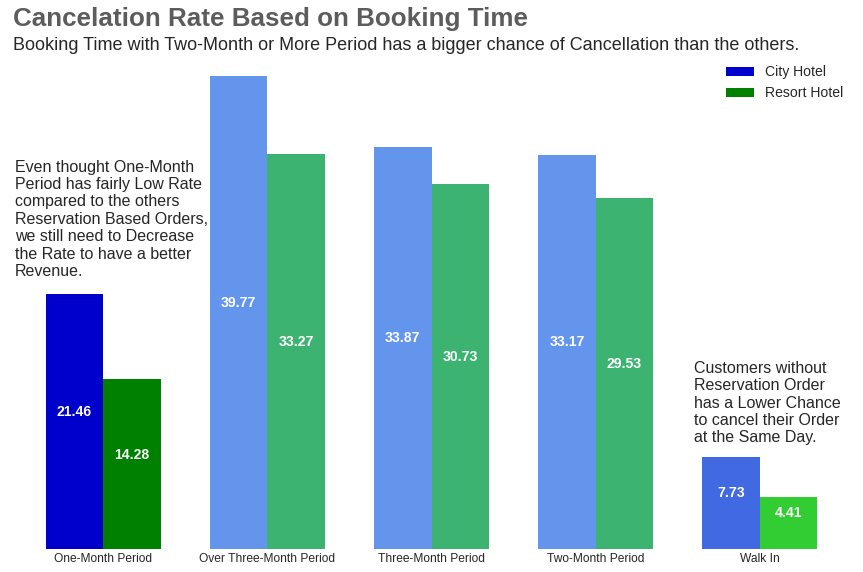

In [182]:
style.use('seaborn-white')

labels = df1['booking_category'].unique().tolist()

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(13,8))
rects1 = ax.bar(x - width / 2, city_booking['percentage'], width, color = set_city_palette(city_booking['percentage']), label='City Hotel')
rects2 = ax.bar(x + width / 2, res_booking['percentage'], width, color = set_res_palette(res_booking['percentage']), label='Resort Hotel')

sns.despine(left=True, bottom=True)
ax.set(xlabel=None)
ax.set(ylabel=None)
plt.yticks([])
plt.tick_params(axis='both', which = 'major', labelsize=12)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(fontsize = 14, loc="upper right")

def autolabel(rects):
   for rect in rects:
      height = rect.get_height()
      ax.annotate('{}'.format(height),
         xy=(rect.get_x() + rect.get_width() / 2, height/2),
         xytext=(0, 3), # 3 points vertical offset
         textcoords="offset points",
         ha='center', va='bottom', color='white', weight='bold',fontsize=14)

autolabel(rects1)
autolabel(rects2)

# Adding a title, a subtitle and text
ax.text(x = -0.55, y = 44, s = "Cancelation Rate Based on Booking Time",
               fontsize = 26, weight = 'bold', alpha = .75)
ax.text(x = -0.55, y = 42,
               s = 'Booking Time with Two-Month or More Period has a bigger chance of Cancellation than the others.',
              fontsize = 18)
ax.text(x = -0.54, y = 23,
               s = 'Even thought One-Month \nPeriod has fairly Low Rate \ncompared to the others \nReservation Based Orders,\nwe still need to Decrease \nthe Rate to have a better \nRevenue.',
              fontsize = 16)
ax.text(x = 3.6, y = 9,
               s = 'Customers without \nReservation Order \nhas a Lower Chance \nto cancel their Order \nat the Same Day.',
              fontsize = 16)

plt.tight_layout()
plt.savefig('booking time.png', dpi=200);
plt.show()